 ## IRIS SPECIES CLASSIFICATION DATA SCIENCE PROJECT-1: 
 The given dataset contains measurements of the species of Iris flower: setosa, versicolor, virginica; and their respective numbers. The following model learns on existing data and makes predictions about the species based on measurements given in the dataset.

In [1]:
# Importing necessary libraries/packages : : 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn


In [2]:
# DATA EXTRACTION AND EXPLORATION
d=pd.read_csv("Iris.csv")


In [3]:
# checking dataset columns
d.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
d.shape

(150, 6)

In [5]:
d.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## UNIVARIATE ANALYSIS OF VARIABLES (COLUMNS)

In [7]:
d.describe()   # only for continuous variables; i.e; except 'Species' column

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
d['Species'].value_counts()   #For categorical variable 'Species'

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
d['Species'].value_counts(normalize=True)   # To see proportions instead of numbers

Species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

<Axes: xlabel='Species'>

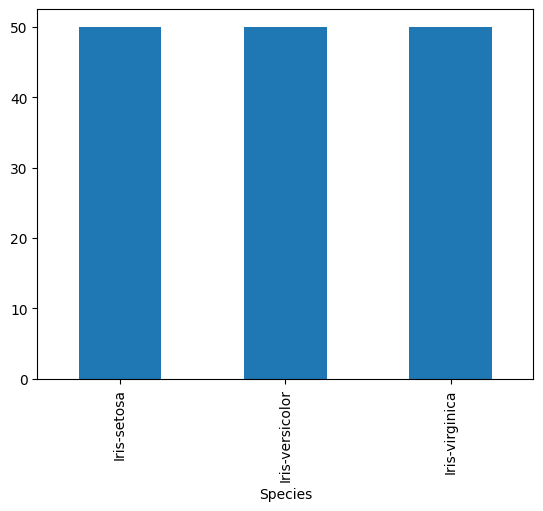

In [10]:
# Bar Plot for Species of Iris csv file
d['Species'].value_counts().plot.bar()

We can observe that out of 150 different entries in the csv dataset, there is equal proportion of each species of the Iris flower, i.e; each type has 50 entries in the dataset.

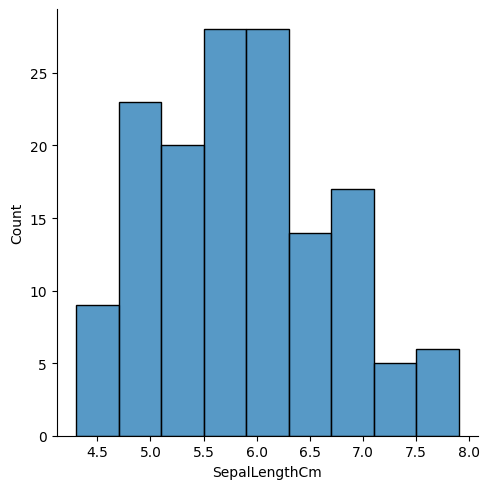

In [11]:
#Distribution plot for 'SepalLengthCm'

sn.displot(d['SepalLengthCm'])

We infer from the above plot that majority of the flowers have sepal length(in cms) falling between 5.5 cm to around 6.25 cms. Similarly we make plots for Sepal width, petal length and width

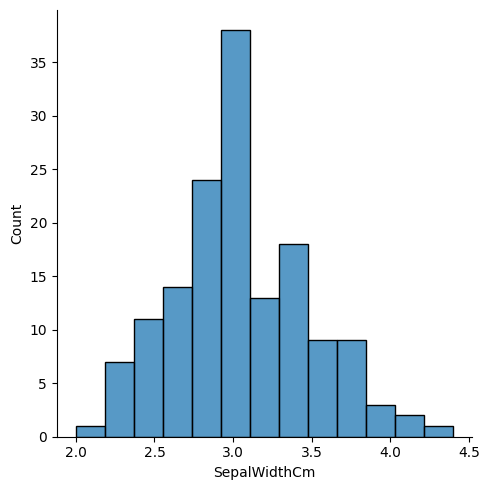

In [12]:
sn.displot(d['SepalWidthCm'])

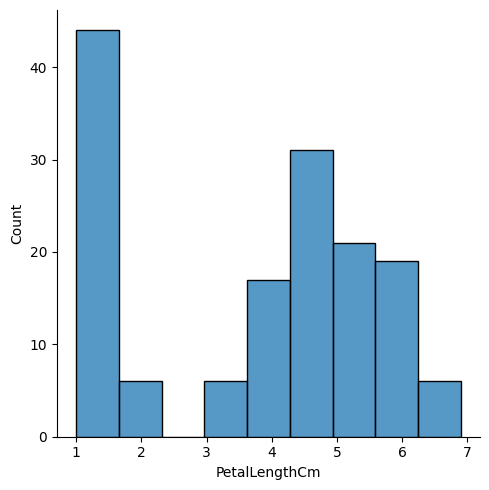

In [13]:
sn.displot(d['PetalLengthCm'])

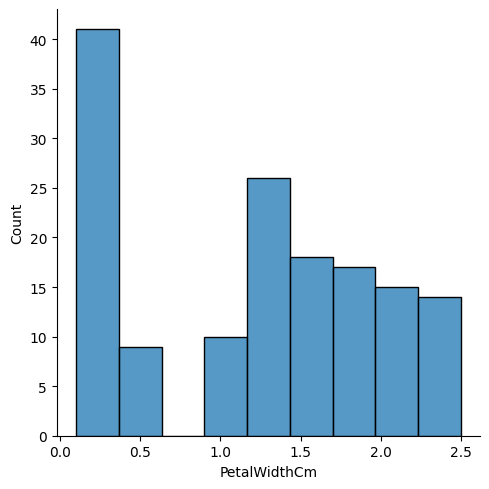

In [14]:
sn.displot(d['PetalWidthCm'])

## BI-VARIATE ANALYSIS

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

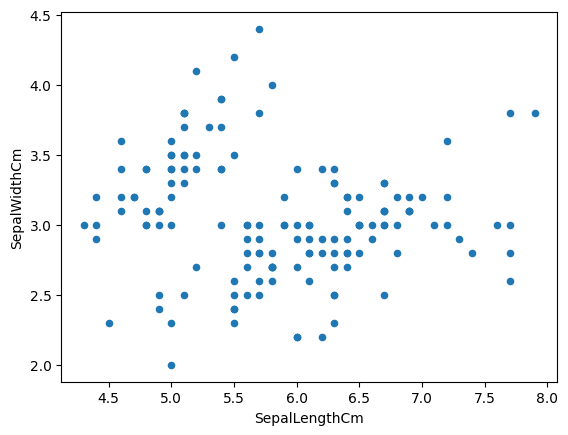

In [15]:
# Scatter Plot between Sepal length and width
d.plot.scatter('SepalLengthCm','SepalWidthCm')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

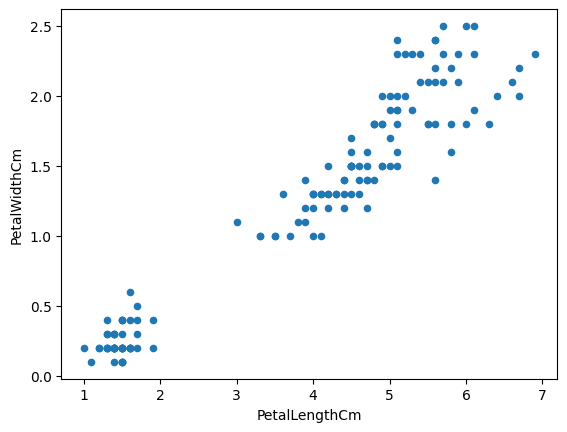

In [16]:
# Scatter Plot between Petal length and width
d.plot.scatter('PetalLengthCm','PetalWidthCm')


We infer that petal length and width are a bit more linearly related than Sepal length and width.

We now change the 'Species' values to numeric :

In [17]:
d.replace({'Species': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}, inplace=True)

C:\Users\rkunw\AppData\Local\Temp\ipykernel_21768\777681577.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d.replace({'Species': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}, inplace=True)


<Axes: >

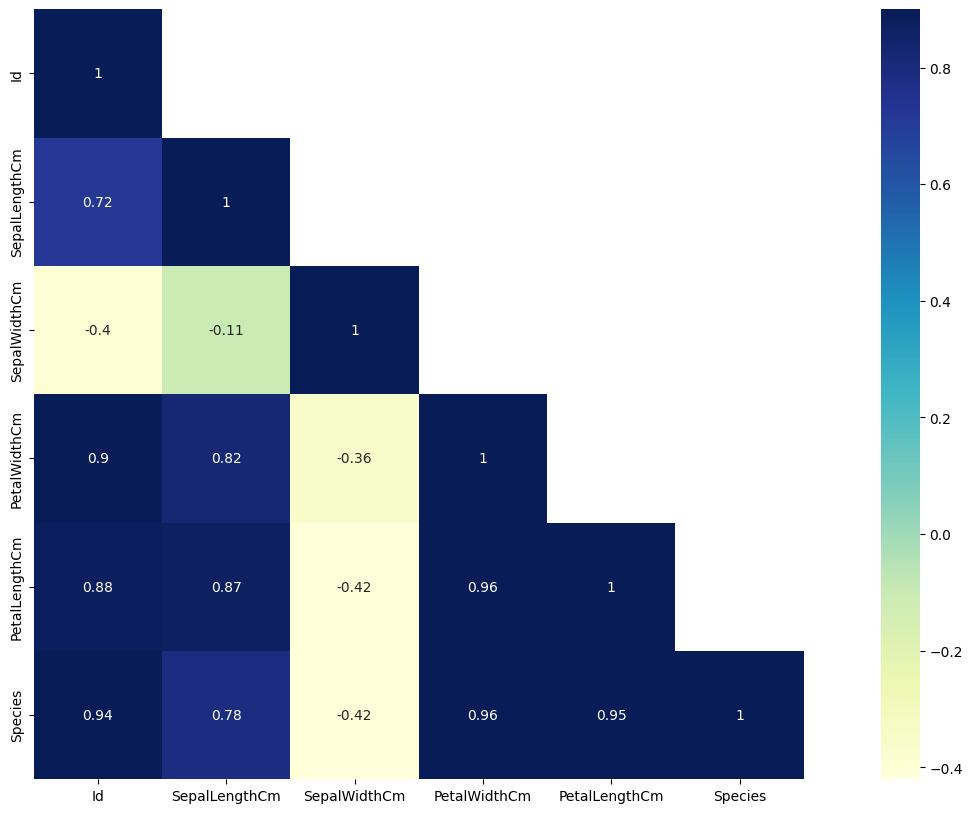

In [18]:
corr = d[['Id', 'SepalLengthCm','SepalWidthCm','PetalWidthCm','PetalLengthCm','Species']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

## MISSING VALUE DETECTION AND SUBSEQUENT TREATMENT
We now look for any misiing value in the dataset

In [19]:
d.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We infer there are no missing values. Hence no need of treating any value in any manner.

## OUTLIER DETECTION

<Axes: >

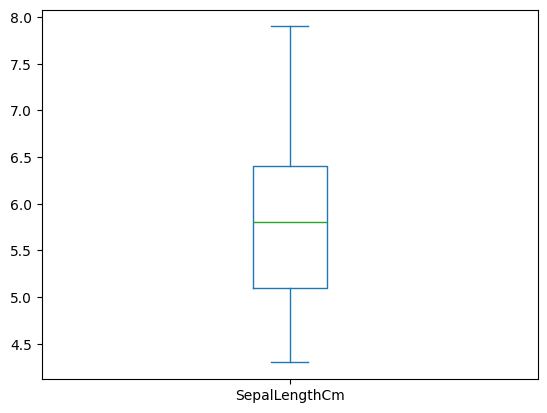

In [20]:
d['SepalLengthCm'].plot.box()

<Axes: >

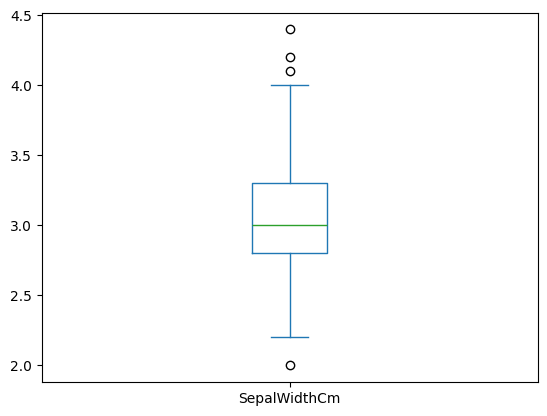

In [21]:
d['SepalWidthCm'].plot.box()

In [22]:
#outlier detected in SepalWidth : treatement :
d=d[(d['SepalWidthCm']>=2.5) & (d['SepalWidthCm']<=4)]


<Axes: >

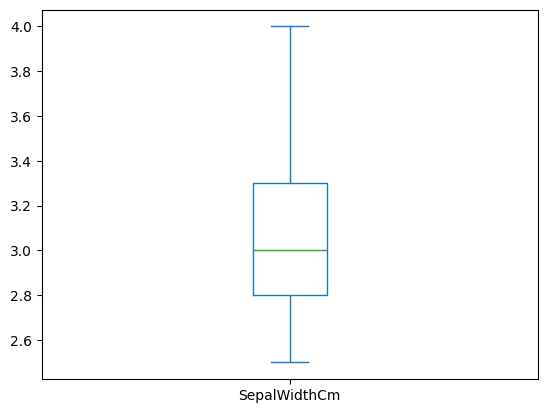

In [23]:
d['SepalWidthCm'].plot.box()

<Axes: >

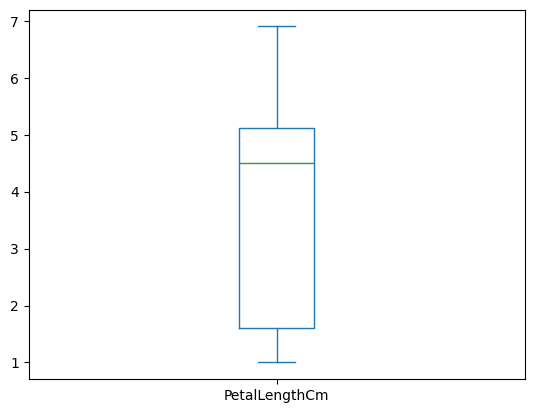

In [24]:
d['PetalLengthCm'].plot.box()

<Axes: >

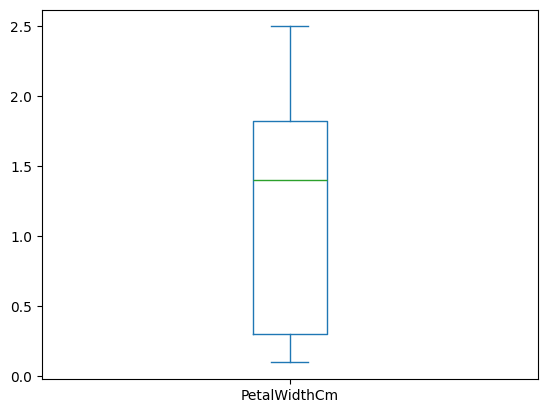

In [25]:
d['PetalWidthCm'].plot.box()

Outlier was detected in SepalWidthCm column and has been treated accordingly.

Now, its time to build our model. 
## MODEL  BUILDING

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
l = LabelEncoder()
d['Species'] = l.fit_transform(d['Species'])  #l-Label encoder object   

C:\Users\rkunw\AppData\Local\Temp\ipykernel_21768\1951422006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Species'] = l.fit_transform(d['Species'])  #l-Label encoder object


In [28]:
X = d.drop(['Id', 'Species'], axis=1)          #feature variables
y = d['Species']                               #target variable

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [30]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = lreg.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy*100,"%")

Logistic Regression Accuracy: 96.42857142857143 %


We come to a conclusion that our model is 96 % accurate when tested using logistic regression.
Now we compute accuracy using Decision tree.

Lets compare Model based on decision tree classifier

## DECISION TREE

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtc=DecisionTreeClassifier()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,stratify=y)

In [36]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
pred=dtc.predict(X_test)

In [38]:
accuracy=accuracy_score(y_test,pred)

In [39]:
print("Accuracy by Decision Tree on test data : ",accuracy*100," %")

Accuracy by Decision Tree on test data :  94.11764705882352  %


We come to conclusion our model is 94 % accurate when we apply decision tree onto dataset.